# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [284]:
dt_demo = pd.read_csv('demo1_encoded.csv')
#dt_demo.mau = dt_demo.mau.map({False: 0, True:1})

In [285]:
dt_demo.isna().sum()

Unnamed: 0                                0
sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated          

In [286]:
dt_demo = dt_demo.drop_duplicates()
dt_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6770 entries, 0 to 6769
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              6770 non-null   int64  
 1   sexo                                    6770 non-null   int64  
 2   posse_de_veiculo                        6770 non-null   int64  
 3   posse_de_imovel                         6770 non-null   int64  
 4   qtd_filhos                              6770 non-null   int64  
 5   idade                                   6770 non-null   float64
 6   tempo_emprego                           6770 non-null   float64
 7   possui_celular                          6770 non-null   int64  
 8   possui_fone_comercial                   6770 non-null   int64  
 9   possui_fone                             6770 non-null   int64  
 10  possui_email                            6770 non-null   int6

In [293]:
dt_demo['mau'].value_counts()

False    6472
True      298
Name: mau, dtype: int64

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [287]:
#2.1 Defina um objeto com a função da árvore de decisão vista em aula.

clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [288]:
y = dt_demo.mau
X = dt_demo.drop('mau', axis=1)


In [289]:
#2.2 Treine o modelo com os dados que você separou para treinamento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100) #separando a base (train e test)


In [290]:
clf = clf.fit(X_train,y_train)

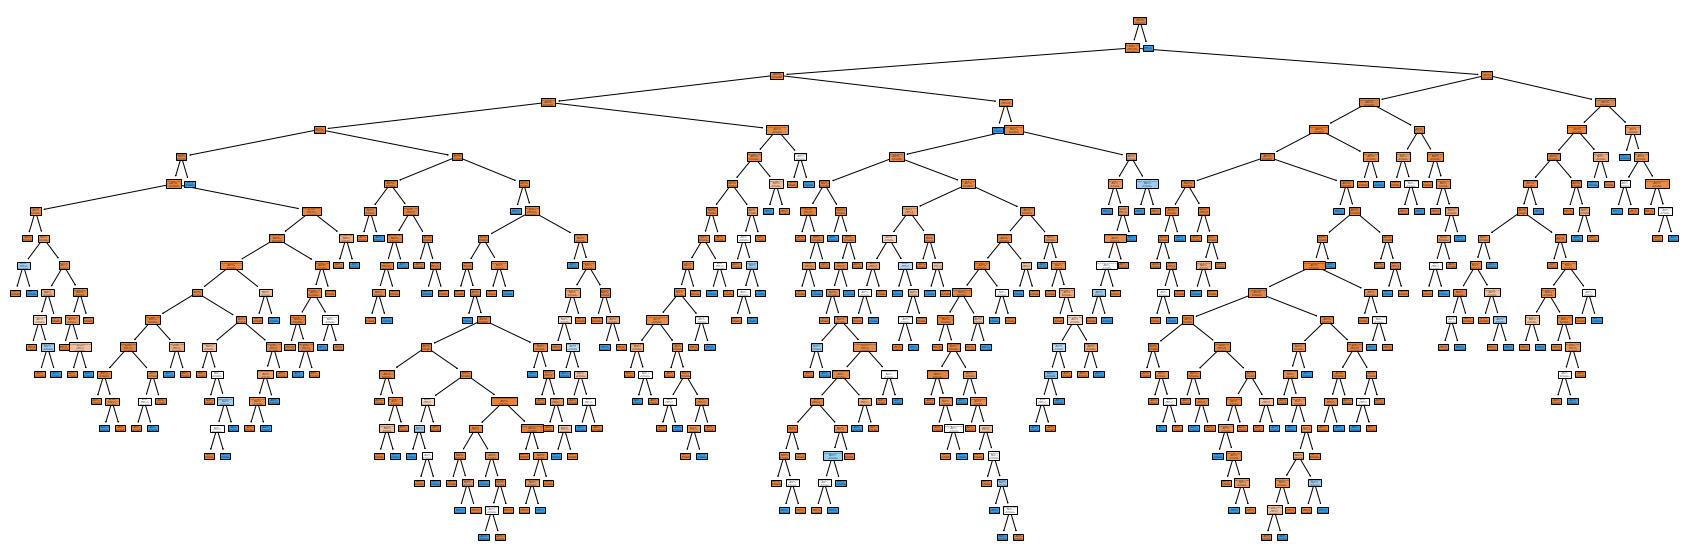

In [291]:
#2.3 Visualize a árvore. Talvez você queira aumentar um pouco a figura.
plt.figure(figsize=(30, 10))
plot_tree(clf,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X_train.columns);

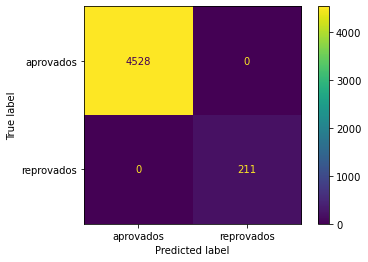

In [300]:
#2.4 Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" 
#    e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.

plot_confusion_matrix(clf, X_train, y_train, display_labels=['aprovados', 'reprovados']);

#overfit

In [301]:
#2.5 Calcule a acurácia na base de treinamento.
predict = clf.predict(X_train)
accuracy_score(y_train, predict)
#overfit

1.0

In [302]:
#Pre pruning - a base está overfit

clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=150, random_state=100)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9694731659281143

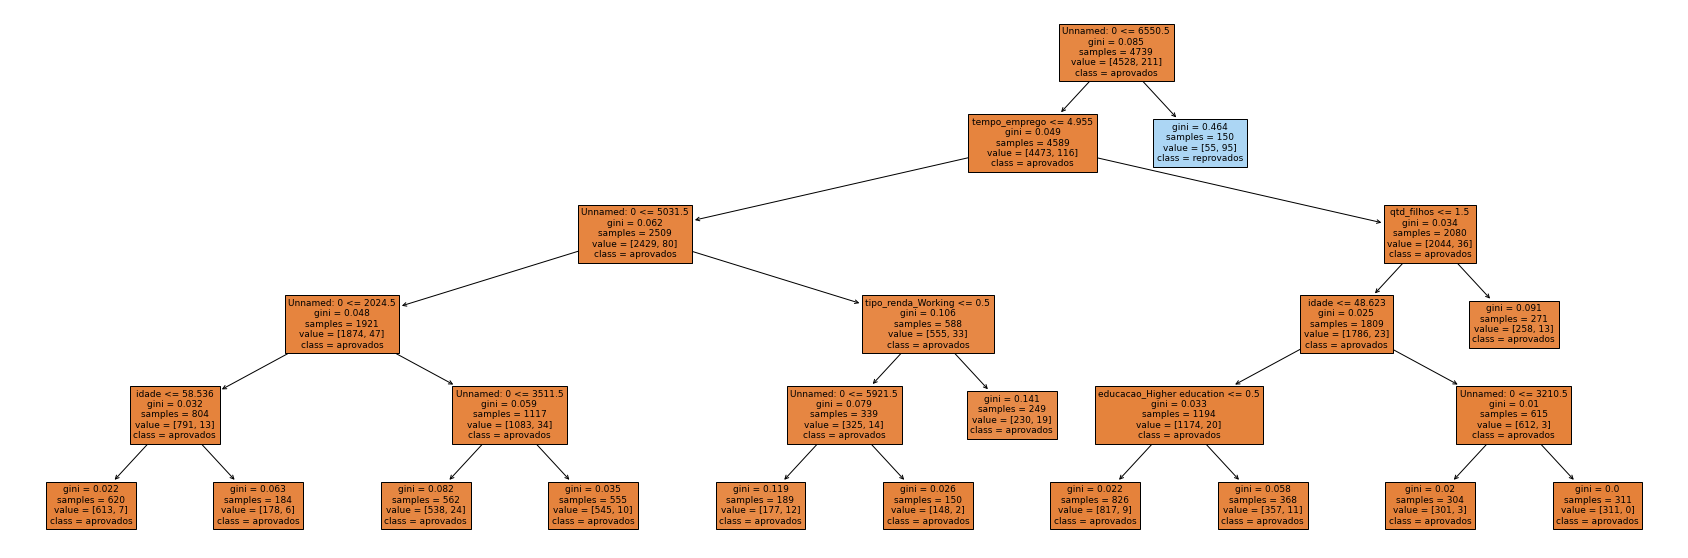

In [303]:
#2.3 Visualize a árvore. Talvez você queira aumentar um pouco a figura.
plt.figure(figsize=(30, 10))
plot_tree(clf,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X_train.columns);

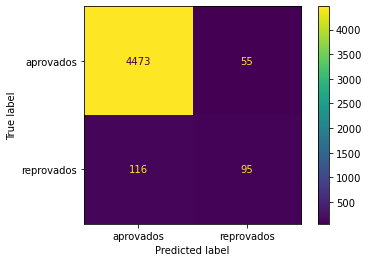

In [304]:
#2.4 Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" 
#    e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
plot_confusion_matrix(clf, X_train, y_train, display_labels=['aprovados', 'reprovados']);

In [306]:
#2.5 Calcule a acurácia na base de treinamento.
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.9639164380671028

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [307]:
#3.1 Classifique a base de teste de acordo com a árvore que você treinou no item 2.
pred = clf.predict(X_test)

In [308]:
accuracy_score(y_test, pred)

0.9694731659281143

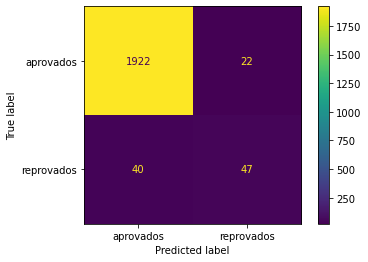

In [309]:
#3.2 Produza a visualização da matriz de confusão para a base de teste.
plot_confusion_matrix(clf, X_test, y_test, display_labels=['aprovados', 'reprovados']);

In [310]:
#3.3 Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
print(f'acurácia base treinamento: {accuracy_score(y_train, predict)} \n')
print(f'acurácia base teste: {accuracy_score(y_test, pred)} \n')


acurácia base treinamento: 0.9639164380671028 

acurácia base teste: 0.9694731659281143 



In [311]:
#3.4 Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. 
#    Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a 
#    proporção de proponentes foram classificados como 'maus'?
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=150, random_state=100)

In [312]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

0.9798129000492368

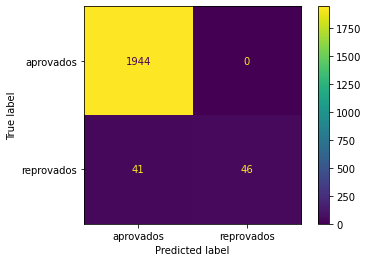

In [313]:
clf_podada.fit(X_train, y_train)
predict = clf_podada.predict(X_test)
plot_confusion_matrix(clf_podada, X_test, y_test, display_labels=['aprovados', 'reprovados']);
accuracy_score(y_test, predict)

In [314]:
#3.5 Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?
copy_demo = dt_demo.copy() #copi do dataframe

In [315]:
copy_demo['mau']= 0  #classificando todos os contratos como bons
copy_demo['mau'].value_counts()

0    6770
Name: mau, dtype: int64

In [316]:
clf = DecisionTreeClassifier(random_state=120)

In [317]:
y = copy_demo.mau
X = copy_demo.drop('mau', axis=1)

In [318]:
clf = clf.fit(X,y)
predict = clf.predict(X)
print(f'acurácia : {accuracy_score(y, predict)} acurárica de 100%') 

acurácia : 1.0 acurárica de 100%


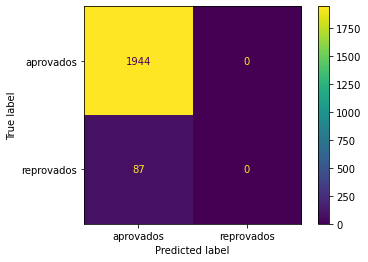

In [319]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['aprovados', 'reprovados']);